# Introduction to Data Science
## Homework 3 Solutions

Student Name: Shaival Dalal

Student Netid: sd3462
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #Decision Tree
import matplotlib.pyplot as plt # To plot graphs
from sklearn.metrics import accuracy_score # To test accuracy
from sklearn import tree

churn=pd.read_csv("../Datasets/Cell2Cell_data.csv")

#We set the training data size to 80% and the remaining to the test set. (trainsize)
trainsize=0.8
#Setting seed to reproduce results if needed
np.random.seed(3462)

#Using numpy's random number generator to generate numbers between 0 and 1. We select values less than the training size which is set to 80%
indx=np.random.rand(len(churn))<trainsize
train_churn=churn[indx]
test_churn=churn[~indx]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<span style="color:blue">**Answer**</span>

We use the random number generator provided by an external library called NumPy. By using this library we generate unique random numbers which are free from selection bias. We can safely assume that selection bias is non-existent

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [2]:
features_train=train_churn.loc[:,'revenue':'retcalls']
target_train=train_churn.loc[:,'churndep']
dtree=DecisionTreeClassifier(criterion="entropy")
trained=dtree.fit(features_train,target_train)

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

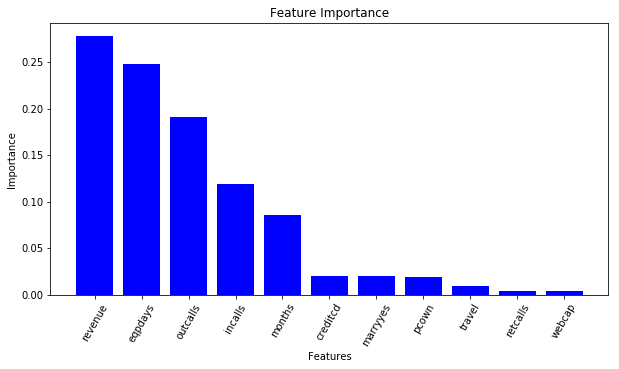

In [3]:
featurelength=np.arange(len(list(features_train)))
names=list(features_train)
importances=pd.DataFrame({"Features":list(features_train),"Importance":trained.feature_importances_})
importances.sort_values(by='Importance',ascending=False,inplace=True)

plt.figure(figsize=(10,5))
plt.title("Feature Importance")

plt.bar(featurelength,importances["Importance"],align="center",color="blue")
plt.xticks(featurelength,importances["Features"],rotation="60")
plt.xlabel('Features')
plt.ylabel('Importance')

## We can alternatively use a vertical bar plot to represent information ##
'''
plt.barh(featurelength,importances["Importance"],align="center",color="blue")
plt.yticks(featurelength,importances["Features"])
plt.ylabel('Features')
plt.xlabel('Importance')
'''

plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [4]:
column_names=list(churn[importances[:3]["Features"]])
column_names.extend(["churndep"])
churn[column_names].corr()

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.221958,0.500870,-0.013566
eqpdays,-0.221958,1.000000,-0.243999,0.112731
outcalls,0.500870,-0.243999,1.000000,-0.037233
churndep,-0.013566,0.112731,-0.037233,1.000000


1. The top 3 features are revenue, eqpdays and outcalls. 
    * Revenue and Eqpdays are **negatively correlated**. This means that as revenue slightly increases, eqpdays decrease. We can infer that once the customer stop using the current equipment and starts using the new, company provided equipment, the company's revenues will slightly increase. The relationship is weak in nature.
    * Revenue and outcalls are **positively correlated** with moderate strength. This means that as the number of outgoing calls of the customer increase, the revenue of the company increases. 
    * Eqpdays and outcalls are **negatively correlated** and the relationship is weak in nature. We can infer that as outgoing calls of customers increase, there is a slight decrease in the eqpdays i.e. the number of days the customer owns their current equipment. This means that customers who make more outgoing calls are somewhat likely to buy new equipment from the company than use their current equipment.

2. The top 3 drivers of churn are monthly revenue **(revenue)**, the number of days the customer has had his/her current equipment **(eqpdays)** and the mean number of outbound voice calls **(outcalls)**.
    * As our revenue per customer increases i.e. the more they pay, the less likely it is that they will churn. This can be attributed to customers finding satisfaction with services provided by us and voluntarily using more services provided by us. Although, the impact of revenue on churn is weak and almost insignificant.
    * The longer our customers use their current equipment, the more likely it is that they will churn. We need to ensure that the customer purchases equipment(s) from us in order to lock-in the customer leading to greater customer stickiness. 
    * The more our customers make outgoing calls, the less likely it is that they will churn. More outgoing calls indicate successful and willing usage of our services. Satisfied customers are less likely to churn. Like revenue, this relation is also weak and almost insignificant.

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [5]:
# Splitting test dataset into target and features
features_test=test_churn.loc[:,'revenue':'retcalls']
target_test=test_churn.loc[:,'churndep']

#  Predicting target for train and test dataset
results_test=trained.predict(features_test)
results_train=trained.predict(features_train)

test_accuracy=accuracy_score(target_test,results_test)
train_accuracy=accuracy_score(target_train,results_train)
print("Accuracy for the test dataset is %.3f%% and accuracy for the training dataset is %.3f%%" %(test_accuracy*100,train_accuracy*100))

Accuracy for the test dataset is 53.445% and accuracy for the training dataset is 99.991%


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [6]:
# We can use graphviz to visualise the decision tree which may help us
# tree.export_graphviz(trained,out_file="DecisionTree")
splits=np.arange(10,1000,100)
leafnodes=np.arange(10,1000,100)

2\. Explain in words your reasoning for choosing the above ranges.

<span style="color:Blue">**Answer** </span>

The model we developed suffers from overfitting as demonstrated by the radical difference in accuracy when run on train and test data set. 
1. We choose a higher **min_samples_split** as the default value of 2 is too low and clearly causes our model to overfit on the training data. Since the size of the data is too large, we select larger values.
2. We choose a higher **min_samples_leaf** as the default value of 1 is too low. However, we don't want the value to be too high as it can result in the model to demonstrate low variance and high bias.
---

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

Optimal 'Sample Split Size' is 710 and 'Optimal Leaf Samples' are 110. Best accuracy is 60.31%


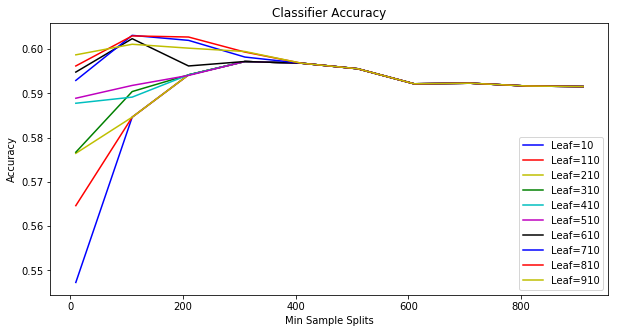

In [7]:
def DtreeIter(train_features,train_target,test_features,test_target,samplesplit,sampleleaf):
    treeOpt=DecisionTreeClassifier(criterion="entropy",min_samples_split=samplesplit,min_samples_leaf=sampleleaf)
    treeOpt=treeOpt.fit(train_features,train_target)
    result_Opt=treeOpt.predict(test_features)
    return accuracy_score(test_target,result_Opt)

result_optimise=dict()
for values in splits:
    result_optimise[values]=list()

for values in splits:
    for nodes in leafnodes:
        result_optimise[values].append([DtreeIter(features_train,target_train,features_test,target_test,values,nodes)])

      
        
#To find out best parameters        
optimal_split=max(result_optimise, key=lambda x: result_optimise[x][1])
optimal_accuracy=max(result_optimise[optimal_split])
optimal_leaf=leafnodes[list(result_optimise[optimal_split]).index(optimal_accuracy)]
print("Optimal 'Sample Split Size' is %d and 'Optimal Leaf Samples' are %d. Best accuracy is %.2f%%" %(optimal_split,optimal_leaf,optimal_accuracy[0]*100))


plt.figure(figsize=(10,5))
plt.plot(splits,result_optimise[leafnodes[0]],'b',label='Leaf={}'.format(leafnodes[0]))
plt.plot(splits,result_optimise[leafnodes[1]],'r',label='Leaf={}'.format(leafnodes[1]))
plt.plot(splits,result_optimise[leafnodes[2]],'y',label='Leaf={}'.format(leafnodes[2]))
plt.plot(splits,result_optimise[leafnodes[3]],'g',label='Leaf={}'.format(leafnodes[3]))
plt.plot(splits,result_optimise[leafnodes[4]],'c',label='Leaf={}'.format(leafnodes[4]))
plt.plot(splits,result_optimise[leafnodes[5]],'m',label='Leaf={}'.format(leafnodes[5]))
plt.plot(splits,result_optimise[leafnodes[6]],'k',label='Leaf={}'.format(leafnodes[6]))
plt.plot(splits,result_optimise[leafnodes[7]],'b',label='Leaf={}'.format(leafnodes[7]))
plt.plot(splits,result_optimise[leafnodes[8]],'r',label='Leaf={}'.format(leafnodes[8]))
plt.plot(splits,result_optimise[leafnodes[9]],'y',label='Leaf={}'.format(leafnodes[9]))
plt.legend(loc=4)
plt.xlabel('Min Sample Splits')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<span style="color:Blue">**Answer** </span>

When we set the Sample Split size to 710 and the Optimal Leaf Samples to 110, we get the best accuracy of 60.31%
This accuracy represents the percentage of times our model predicts the correct output. Values predicted by the model are compared with actual value in the test data set to determine this metric.

---

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<span style="color:Blue">**Answer** </span>

Churn prediction is an extremely important activity for any company. In the marketing department, churn can be of both high performing salesmen as well as customers. 
 * By analysing customer churn, a company can take reasonable steps to retain the existing customer. Losing a customer will not only cost the company in lost revenue, but the company will also incur additional cost to bring in a new customer which often results in higher costs due to extra advertising or onboarding benefits. Customer acquisition is [5-40 times more expensive](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) than customer retention and it makes economic sense for the company to keep existing customers happy. Doing so may also result in an increase in profits due to increased engagement with customers.
 * By analysing employee churn, a company can retain its high performing employees by rewarding them with perks and benefits as the salesperson is often the face of the company during negotiations. Loss of a high performing employee will cause a drop in sales and might also cause existing customers associated with that salesperson to shift loyalties.
 
By referring to the churn prediction model, the company can take decisive steps to pursue its employees and customers.
 * E.g.: A customer identified by the model may be rewarded with a free discount voucher or a free exclusive service for a trial period or more industry relevant and personally rewarding offers. By doing so, the customer may feel more attached to the company resulting in an enhanced utilisation of related products and services.
 * E.g.: A high performing salesperson identified by the model can be rewarded with a free holiday package or a free mobile phone or more personally rewarding products and services in order to increase the employee's association with the company.
---

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [18]:
from scipy import stats
from statsmodels.graphics.api import qqplot

fever=pd.read_csv("../Datasets/cases.csv")
# We can directly read and convert using the read_csv function by using the below command:
# fever=pd.read_csv("../Datasets/cases.csv",parse_dates=[0])
fever["YEAR"]=pd.to_datetime(fever["YEAR"],format="%Y")

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

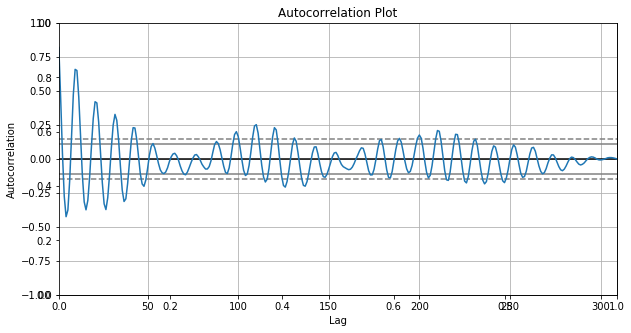

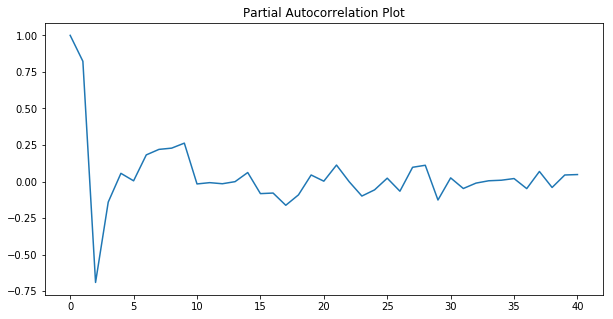

In [19]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import pacf,acf

plt.figure(1)
plt.figure(figsize=(10,5))
plt.title("Autocorrelation Plot")
autocorrelation_plot(fever["YFCASES"])
plt.figure(2)
plt.figure(figsize=(10,5))
plt.title("Partial Autocorrelation Plot")
plt.plot(pacf(fever["YFCASES"]))
plt.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<span style="color:Blue">**Answer** </span>
1. The autocorrelation plot shows a sine-wave pattern meaning that the data exhibits strong seasonality.
2. The partial autocorrelation plot shows sharp spikes at lag of 1 and 2.

**We use "Rule 2" and select the autocorrelation parameter as 2 i.e. p=2 and q=0**

---

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [20]:
# We run Durbin Watson test on the residuls that we obtain from the OLS.
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson

ols_residuals=OLS(fever["YFCASES"],np.ones(len(fever["YFCASES"]))).fit()
durbin_watson(ols_residuals.resid)

0.35126855165831666

<span style="color:Blue">**Answer** </span>
* We observe that the Durbin-Watson statistic is approximately 0.35 which means that there is strong positive relation between the previous and the current value of reported cases of yellow fever. The DW statistic matches the output observed from the autocorrelation plot which indicated strong correlation with lagged values.
* E.g.: If the number of yellow fever cases increase in the current year, they will increase further in the next year and vice versa.
* We can use the ARMA model to remove this autocorrelation between lagged values.
---

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


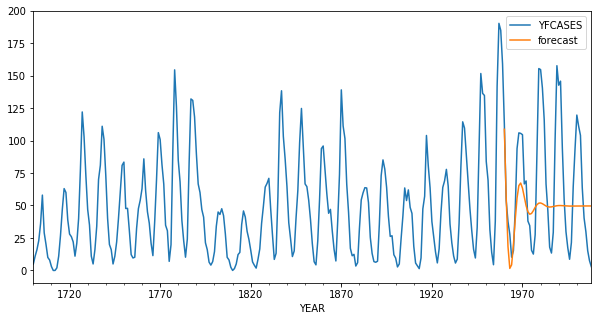

In [21]:
from statsmodels import tsa
import statsmodels.api as sm  

indexedFever=fever.set_index("YEAR")
cases=indexedFever.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
cases['forecast'] = arma_result.predict(start = 260 , end= 309, dynamic= True)  
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=41.736017448911511, pvalue=8.6524472974138723e-10)


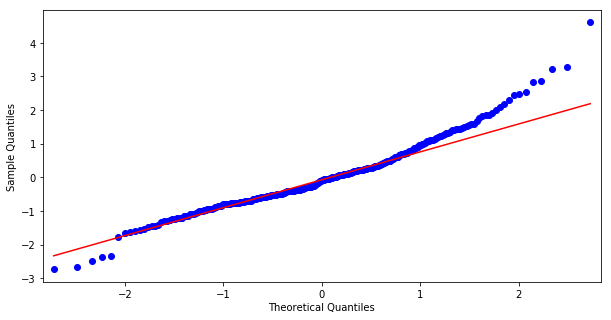

In [22]:
print(stats.normaltest(arma_result.resid))
figureP3 = plt.figure(figsize=(10,5))
ax = figureP3.add_subplot(1,1,1)
figP3 = qqplot(arma_result.resid, line='q', ax=ax, fit=True)
plt.show()

<span style="color:Blue">**Answer** </span>

* We performed the test of normality on our data and also plotted a qqplot. The results of our normality test and our qqplot do not match.
 * Our null hypothesis is that the distribution is normal. However, the p-value is less than 0.05 giving us enough evidence to reject the null hypothesis. This means that the data is not from a normal distribution.
 * Our qqplot indicates that our data follows the theoretical normal distribution line.
 
 ---

7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


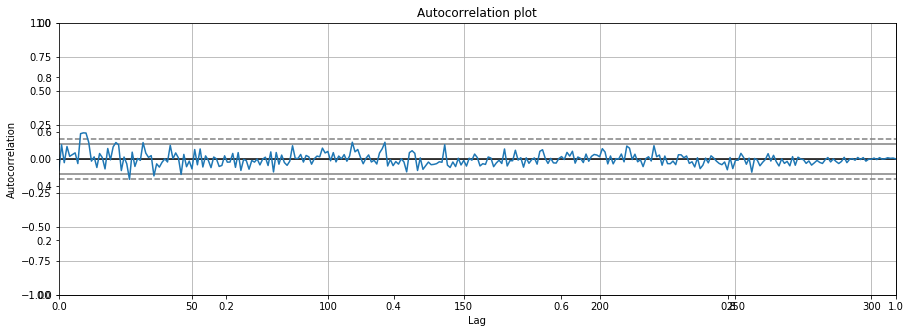

(array([  1.00000000e+00,  -8.52201647e-02,   1.03691476e-01,
         -2.78328803e-02,   9.11224990e-02,   1.90096298e-02,
          3.13205117e-02,   4.44845966e-02,  -3.43373370e-02,
          1.85689571e-01,   1.91607603e-01,   1.90384959e-01,
          1.21692862e-01,  -1.62188311e-02,   1.49863384e-02,
         -6.31966357e-02,   3.97300659e-02,   9.57662814e-03,
         -7.36448107e-02,   7.64692114e-02,  -6.82680210e-03,
          8.88181354e-02,   1.20484583e-01,   1.03328477e-01,
         -8.57282362e-02,   1.37300260e-02,  -3.61829620e-02,
         -1.50155866e-01,   4.96801646e-02,  -5.54670873e-02,
          3.35398837e-03,  -1.09052797e-02,   1.20385657e-01,
          4.26796218e-02,   1.11070919e-02,   2.42613184e-02,
         -1.25046078e-01,  -3.63935184e-02,  -6.05085208e-02,
         -2.44395756e-02,   5.81174208e-04]),
 array([  2.2659634 ,   5.63159523,   5.87487934,   8.49107531,
          8.60530858,   8.91643288,   9.54612932,   9.92256051,
         20.96773648

In [23]:
plt.figure(figsize=(15,5))
plt.title("Autocorrelation plot")
autocorrelation_plot(arma_result.resid)
plt.show()
acfValue=acf(arma_result.resid,qstat=True)
autocorrelation_value=acfValue[0]
qstat_value=acfValue[1]
p_value=acfValue[2]
acfValue

<span style="color:Blue">**Answer** </span>

* The autocorrelation plot has improved as we see an absence of sinusoidal pattern which was earlier evident. We have reduced the impact of seasonality using the ARMA model.
* The Ljung–Box Q test is used to indicate whether our data is independently distributed or not. Based on the analysis of p values, can reject the null hypothesis that the data is independently distributed. We conclude that our data exhibits serial correlation. 
---

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



In [24]:
from pandas import datetime
begin_year = datetime(2009,1,1)
end_year = datetime(2012,1,1)
forecasted = arma_result.predict(start=begin_year, end=end_year)
forecasted

2009-01-01    13.662904
2010-01-01    31.797825
2011-01-01    49.606231
2012-01-01    61.884409
Freq: AS-JAN, dtype: float64

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

ferror_begin=datetime(1700,1,1)
ferror_end=datetime(2008,1,1)
predictionARMA=arma_result.predict(start=ferror_begin,end=ferror_end)
MAE=mean_absolute_error(fever["YFCASES"],predictionARMA)
MFE=mean_squared_error(fever["YFCASES"],predictionARMA)
print("MAE is %f and MFE is %f" %(MAE,MFE))

MAE is 12.625231 and MFE is 280.128292


<span style="color:Blue">**Answer** </span>

* Our MAE (Mean Absolute Error) is 12.62 which means that the model is not perfect and that values predicted by the model deviate from the true values.
* The MFE (Mean Forecast Error) is 280.12 which implies that the model predicts values that are much lesser than the true values. 
---